In [39]:
import nltk
import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

from textblob import TextBlob
from google.colab import drive

In [40]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [41]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
data = pd.read_csv('/content/drive/MyDrive/sentimentdataset.csv')

In [44]:
data = data['Text']

In [45]:
data.head()

0     Enjoying a beautiful day at the park!        ...
1     Traffic was terrible this morning.           ...
2     Just finished an amazing workout! 💪          ...
3     Excited about the upcoming weekend getaway!  ...
4     Trying out a new recipe for dinner tonight.  ...
Name: Text, dtype: object

In [46]:
data.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
727    False
728    False
729    False
730    False
731    False
Name: Text, Length: 732, dtype: bool

In [47]:
data.shape

(732,)

# Preprocessing funcions

In [48]:
def remove_stop(text):
  stop_words = set(stopwords.words('english'))
  tokens = word_tokenize(text.lower()) # convert all text to lowercase before tokenizing

  filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
  filtered_text = ' '.join(filtered_tokens)

  return filtered_text

In [49]:
def remove_digits(text):
  return re.sub('[0-9]+', '', text)

In [50]:
pun_list = string.punctuation

def remove_pun(text):
  translator = str.maketrans('','', pun_list)
  return text.translate(translator)

In [62]:
def clean_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

In [51]:
def clean_emails(text):
  return re.sub('@[^\s]+','', text)

In [54]:
def get_token(text):
  tokens = word_tokenize(text)
  return tokens

In [68]:
def joined(text):
  return ' '.join(text)

In [52]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if no match

def apply_lemma(text):
    stemmer = WordNetLemmatizer()
    pos_tags = pos_tag(text)
    filtered = [stemmer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
    return filtered

# Applying preprocessing functions to our data

In [55]:
data = data.apply(remove_stop)

In [57]:
data.head()

0         enjoying beautiful day park
1            traffic terrible morning
2            finished amazing workout
3    excited upcoming weekend getaway
4    trying new recipe dinner tonight
Name: Text, dtype: object

In [58]:
data = data.apply(remove_digits)

In [59]:
data.head()

0         enjoying beautiful day park
1            traffic terrible morning
2            finished amazing workout
3    excited upcoming weekend getaway
4    trying new recipe dinner tonight
Name: Text, dtype: object

In [60]:
data = data.apply(remove_pun)

In [61]:
data.head()

0         enjoying beautiful day park
1            traffic terrible morning
2            finished amazing workout
3    excited upcoming weekend getaway
4    trying new recipe dinner tonight
Name: Text, dtype: object

In [63]:
data = data.apply(clean_URLs).apply(clean_emails)
data.head()

0         enjoying beautiful day park
1            traffic terrible morning
2            finished amazing workout
3    excited upcoming weekend getaway
4    trying new recipe dinner tonight
Name: Text, dtype: object

In [64]:
data = data.apply(get_token)

In [65]:
data.head(15)

0                    [enjoying, beautiful, day, park]
1                        [traffic, terrible, morning]
2                        [finished, amazing, workout]
3               [excited, upcoming, weekend, getaway]
4              [trying, new, recipe, dinner, tonight]
5           [feeling, grateful, little, things, life]
6     [rainy, days, call, cozy, blankets, hot, cocoa]
7                               [new, movie, release]
8         [political, discussions, heating, timeline]
9               [missing, summer, vibes, beach, days]
10                [published, new, blog, post, check]
11                     [feeling, bit, weather, today]
12                    [exploring, city, hidden, gems]
13                   [new, year, new, fitness, goals]
14                  [technology, changing, way, live]
Name: Text, dtype: object

In [66]:
data = data.apply(apply_lemma)

In [67]:
data.head(20)

0                     [enjoy, beautiful, day, park]
1                      [traffic, terrible, morning]
2                          [finish, amaze, workout]
3             [excited, upcoming, weekend, getaway]
4               [try, new, recipe, dinner, tonight]
5             [feel, grateful, little, thing, life]
6     [rainy, day, call, cozy, blanket, hot, cocoa]
7                             [new, movie, release]
8           [political, discussion, heat, timeline]
9                  [miss, summer, vibe, beach, day]
10                [publish, new, blog, post, check]
11                      [feel, bit, weather, today]
12                     [explore, city, hidden, gem]
13                  [new, year, new, fitness, goal]
14                  [technology, change, way, live]
15                     [reflect, past, look, ahead]
16                     [adopt, cute, furry, friend]
17                          [game, session, friend]
18                [attend, virtual, conference, ai]
19          

In [69]:
data = data.apply(joined)

In [70]:
data.head(20)

0                  enjoy beautiful day park
1                  traffic terrible morning
2                      finish amaze workout
3          excited upcoming weekend getaway
4             try new recipe dinner tonight
5           feel grateful little thing life
6     rainy day call cozy blanket hot cocoa
7                         new movie release
8        political discussion heat timeline
9                miss summer vibe beach day
10              publish new blog post check
11                   feel bit weather today
12                  explore city hidden gem
13                new year new fitness goal
14               technology change way live
15                  reflect past look ahead
16                  adopt cute furry friend
17                      game session friend
18             attend virtual conference ai
19                 winter blue get feel low
Name: Text, dtype: object

# Building Our Model

In [73]:
def text_blob(text):
  blob = TextBlob(text)
  sentiment_polarity = blob.sentiment.polarity
  sentiment_subjectivity = blob.sentiment.subjectivity

  return sentiment_polarity, sentiment_subjectivity

In [74]:
data.columns = ["Text"]

In [75]:
data.head()

0            enjoy beautiful day park
1            traffic terrible morning
2                finish amaze workout
3    excited upcoming weekend getaway
4       try new recipe dinner tonight
Name: Text, dtype: object

In [77]:
data['polarity'], data['subjectivity'] = zip(*data.apply(text_blob))

In [78]:
data.head()

0            enjoy beautiful day park
1            traffic terrible morning
2                finish amaze workout
3    excited upcoming weekend getaway
4       try new recipe dinner tonight
Name: Text, dtype: object

In [81]:
data_polarity = pd.DataFrame(data['polarity'])

In [82]:
data_polarity.head()

,0
0,0.625000
1,-1.000000
2,0.000000
3,0.375000
4,0.136364


In [83]:
data_subjectivity = pd.DataFrame(data['subjectivity'])

In [84]:
data_subjectivity.head()

,0
0,0.750000
1,1.000000
2,0.000000
3,0.750000
4,0.454545


In [85]:
data_final = pd.concat([data, data_polarity, data_subjectivity], axis=1)

In [86]:
data_final.head()

,Text,0,0
0,enjoy beautiful day park,0.625000,0.750000
1,traffic terrible morning,-1.000000,1.000000
2,finish amaze workout,0.000000,0.000000
3,excited upcoming weekend getaway,0.375000,0.750000
4,try new recipe dinner tonight,0.136364,0.454545


In [87]:
data_final.columns = ['Text', 'Polarity', 'Subjectivity']

In [88]:
data_final.head()

,Text,Polarity,Subjectivity
0,enjoy beautiful day park,0.625000,0.750000
1,traffic terrible morning,-1.000000,1.000000
2,finish amaze workout,0.000000,0.000000
3,excited upcoming weekend getaway,0.375000,0.750000
4,try new recipe dinner tonight,0.136364,0.454545


from matplotlib import pyplot as plt
_df_0['Polarity'].plot(kind='hist', bins=20, title='Polarity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Subjectivity'].plot(kind='hist', bins=20, title='Subjectivity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Polarity', y='Subjectivity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Polarity'].plot(kind='line', figsize=(8, 4), title='Polarity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Subjectivity'].plot(kind='line', figsize=(8, 4), title='Subjectivity')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['Text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='Polarity', y='Text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['Text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='Subjectivity', y='Text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

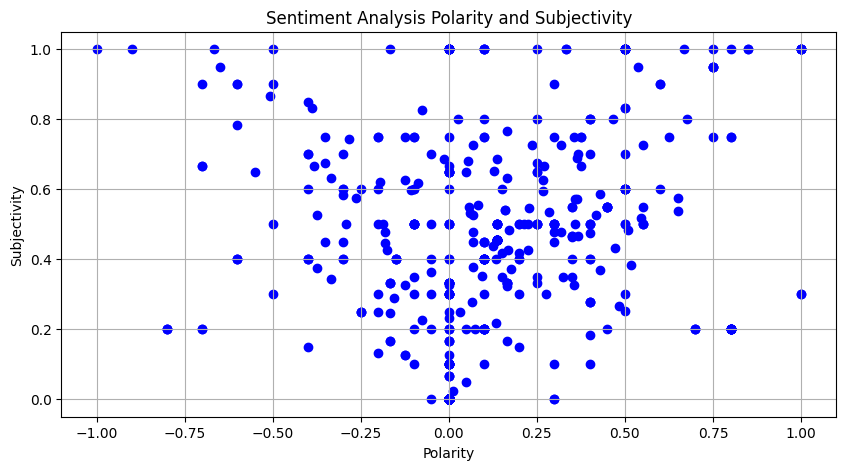

In [92]:
plt.figure(figsize=(10, 5))
plt.scatter(data['polarity'], data['subjectivity'], color='blue')
plt.title('Sentiment Analysis Polarity and Subjectivity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.grid(True)

plt.show()